## MNIST exercise (handwritten printed digits recognition tutorial) ##
**Goal: Introduction to Keras, convolution feature maps, and features**

**Exercise:**
    
1. Review the steps of the code in this notebook
2. Look for the model.Sequential statement 
   and fill in the blanks: <br>
3. run the notebook, observe the images of filter weights and activations (at end)
4. Try changing the filter size for the first convolution layer to something large (like 9x9 or 16x16)
        How does that change the images of filter weights and activations?
<br>
Question to consider: for 10 digits what is min number of filters needed?



In [1]:
!pip install tensorflow -q

In [2]:
# ----------- IMPORT STATEMENTS ---------------
import numpy as np
np.random.seed(1)  # for reproducibility

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging

from tensorflow import keras
import tensorflow as tf

# Optional: Turn off oneDNN optimizations if needed
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

print('import done')

import done


In [3]:
#Load MNIST data from Keras datasets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X_train=X_train[0:1000,]  #only need smaller subset to get good results
Y_train=Y_train[0:1000,]

# --------- Reshape input data, b/c Keras expects N-3D images (ie 4D matrix)
X_train = X_train[:,:,:,np.newaxis]
X_test  = X_test[:,:,:,np.newaxis]

#Scale 0 to 1  - or should we not scale
X_train = X_train/255.0
X_test  = X_test/255.0

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test  = keras.utils.to_categorical(Y_test,  10)

# ------------- End loading and preparing data --------------
print('X train shape:', X_train.shape) 
print('X test shape:', X_test.shape) 


X train shape: (1000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


## 1 convolution parameters

Follow the URL link to see the Keras api documentation for command format

https://keras.io/api/layers/convolution_layers/convolution2d/


Try for example, 32,16 or 8 filters
Try 3x3 or 9x9 or 16x16 filter sizes

NOTE that we are using a function to build the model, which will be useful later

##  2 the optimizer to use Adam
Notice that Keras parameters can sometimes be filled in with a string (like 'adam') or sometimes with function like keras.optimizers.Adam(learning_rate=0.01).
See the example at this link:

https://keras.io/api/optimizers/

In [4]:
# --------------Set up Model ---------------------
def build_model(numfilters):
    mymodel = keras.models.Sequential()
    mymodel.add(keras.layers.Convolution2D(numfilters,      #<<<< ------ 1
                                       (3, 3),
                                       strides=1,  
                                       data_format="channels_last",
                                       activation='relu', 
                                       input_shape=(28,28,1))) 
    mymodel.add(keras.layers.Convolution2D(numfilters,      #<<<< ------ 1
                                       (3, 3),
                                       strides=1,  
                                       data_format="channels_last",
                                       activation='relu')) 
    mymodel.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,data_format="channels_last")) #get Max over 2D region,and slide
    mymodel.add(keras.layers.Flatten())            #reorganize 2DxFilters output into 1D
  
    #----------------Now add final classification layers
    mymodel.add(keras.layers.Dense(32, activation='relu'))   
    mymodel.add(keras.layers.Dense(10, activation='softmax'))
    
    # --------- Now configure model algorithm -----
    mymodel.compile(loss='categorical_crossentropy',
               optimizer=keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

    return mymodel

In [5]:
# Call the build_model function
mymodel = build_model(numfilters=16)  # <<<---------- set num filters argument here

# Display the model summary
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                73760     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [6]:
myES_function = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5,  restore_best_weights=True) #patience before stopping

#------------ Now Run Training
fit_history=mymodel.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          batch_size=128, epochs=50, verbose=1,callbacks=[myES_function])

Epoch 1/50
8/8 [==============================] - 2s 58ms/step - loss: 1.4648 - accuracy: 0.4950 - val_loss: 0.8272 - val_accuracy: 0.7372
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.5085 - accuracy: 0.8430 - val_loss: 0.4717 - val_accuracy: 0.8586
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2512 - accuracy: 0.9360 - val_loss: 0.3418 - val_accuracy: 0.9012
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1426 - accuracy: 0.9580 - val_loss: 0.2968 - val_accuracy: 0.9076
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0624 - accuracy: 0.9820 - val_loss: 0.2702 - val_accuracy: 0.9242
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0350 - accuracy: 0.9910 - val_loss: 0.3372 - val_accuracy: 0.9175
Epoch 7/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 0.3348 - val_accuracy: 0.9216
Epoch 8/50
8/8 [===========

## The rest of this notebook is plotting and image displays

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


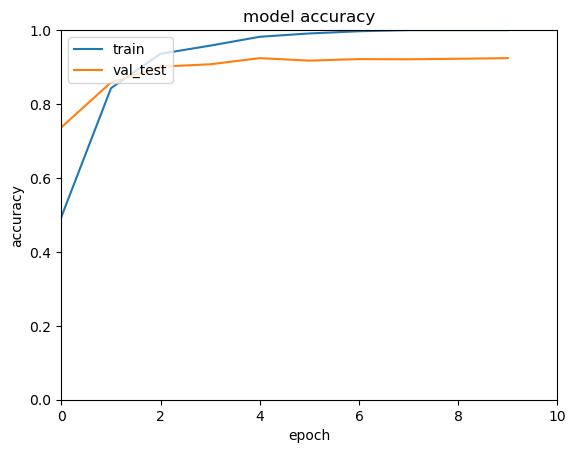

In [7]:
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg
%matplotlib inline                   

# list all data in history and print out performance
print(fit_history.history.keys())
numtraining_epochs=len(fit_history.history['accuracy'])
# summarize history for accuracy
plt.figure()
plt.axis([0 ,numtraining_epochs, 0, 1])
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper left')
plt.show()

In [9]:
#

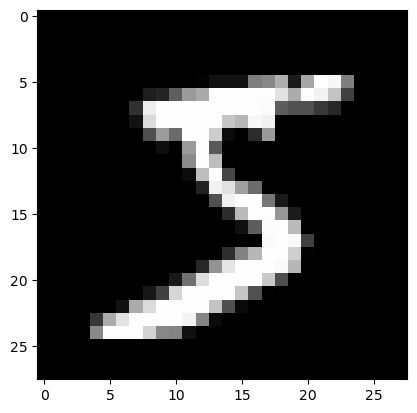

In [8]:
#To view a sample image
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg

tmpimg=np.squeeze(X_train[0,:,:,:]).reshape((28,28))
plt.imshow(tmpimg,'gray')   

W3D shape Wlist[0]:(16, 3, 3)


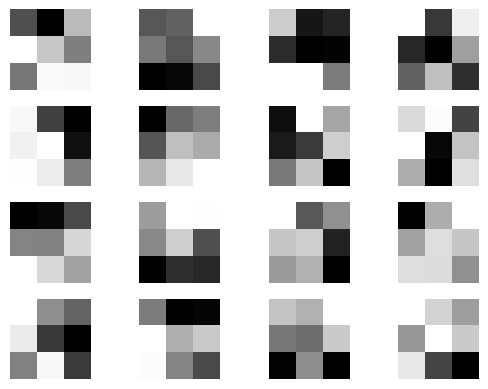

done plotting weights mosaic


In [10]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =mymodel.layers[0].get_weights()      
W3D     =np.squeeze(Wlist[0])
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get the channels as 1st dimension;
print("W3D shape Wlist[0]:"+str(W3Dchan.shape))

#plot mosaic of filters of 
ncol =4
nrow =np.ceil(16/ncol).astype(int)   #assume 16 is number of filters
plt.figure()
for i in range(W3Dchan.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(W3Dchan[i],'gray')
   plt.axis('off')

plt.show()
print('done plotting weights mosaic')

In [11]:
#

In [12]:
#  ---------------- NOW Visualize the activations for the first training example --------
#   1. gather activations from the model layers
# -------------------------------------------------------------------------
import numpy as np

layer_outputs     = [layer.output for layer in mymodel.layers[:]]
my_model_actvtns  = keras.models.Model(inputs=mymodel.input, outputs=layer_outputs)
x                 = np.expand_dims(X_train[0],0)           #set up a 4D input of 1 image training set 
my_actvtns_output = my_model_actvtns.predict(x)   #for each image get predictions/activatns

print('There are ',str(len(my_actvtns_output))+ ' layers with output activations')



1/1 [==============================] - 0s 104ms/step
There are  6 layers with output activations


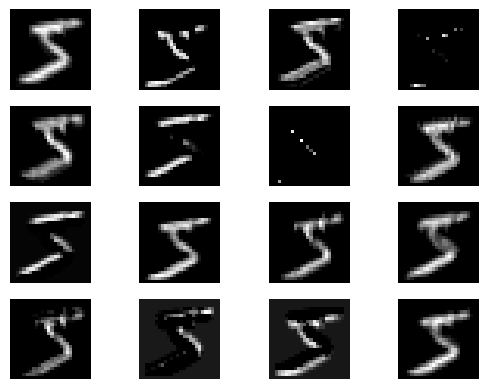

done plotting layer1 activation output mosaic


In [13]:
# 2.  Now output a mosaic of layer 1
layeroutput3D      = np.squeeze(my_actvtns_output[0]) #<<---- -try different layer output     
ncol =4
nrow =np.ceil(16/ncol).astype(int)
plt.figure()
for i in range(layeroutput3D.shape[2]):  
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[:,:,i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer1 activation output mosaic')
